In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
# Pandas for managing datasets
import pandas as pd
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns
import os
from tools.data_extraction import DataExtractor
from tools.trajectory_generator import TrajectoryGenerator
from tools.utils import standardize_data, print_genetic_param, print_settings, set_movements, angle_diff

/home/kotsos/github/hua-thesis


In [2]:
tr_gen_options = {"samples": 25,
                  "freq": 5,
                  "reset_data": True,
                 "init_speed":20}
dt_gen_options = {"n_test": 5}

train_test_options = {"split": 25}

df_csv_options = {"ts_class": "Bearing"}


first_movement = ['creeping_line_left']
second_movement = ['random']
movements = {'first_movement': first_movement,'second_movement': second_movement}
set_movements(movements)


# Create files if not created
tr_gen = TrajectoryGenerator(**tr_gen_options)
tr_gen.data_generation(**dt_gen_options)

2019-04-23 16:14:43.208 | INFO     | tools.trajectory_generator:data_generation:618 - 
Starting the generator with attributes: 
Original latitude: 37.295493
Original longitude: 23.824322
Initial bearing: 90
Initial speed: 20
Number of samples: 25
Starting time of measurements: 2015-02-01 12:00:00
With initial frequency of collected data: 5 min
and hard reset of data: True
2019-04-23 16:14:43.211 | INFO     | tools.trajectory_generator:data_generation:621 - Create directory 'data' 
2019-04-23 16:14:43.214 | INFO     | tools.trajectory_generator:data_generation:627 - now creating data for movement: creeping_line_left
2019-04-23 16:14:43.972 | INFO     | tools.trajectory_generator:data_generation:632 - now creating data for movement: random
2019-04-23 16:14:45.798 | SUCCESS  | tools.trajectory_generator:data_generation:665 - Done with generator


Text(0.5, 0, 'Longitude ')

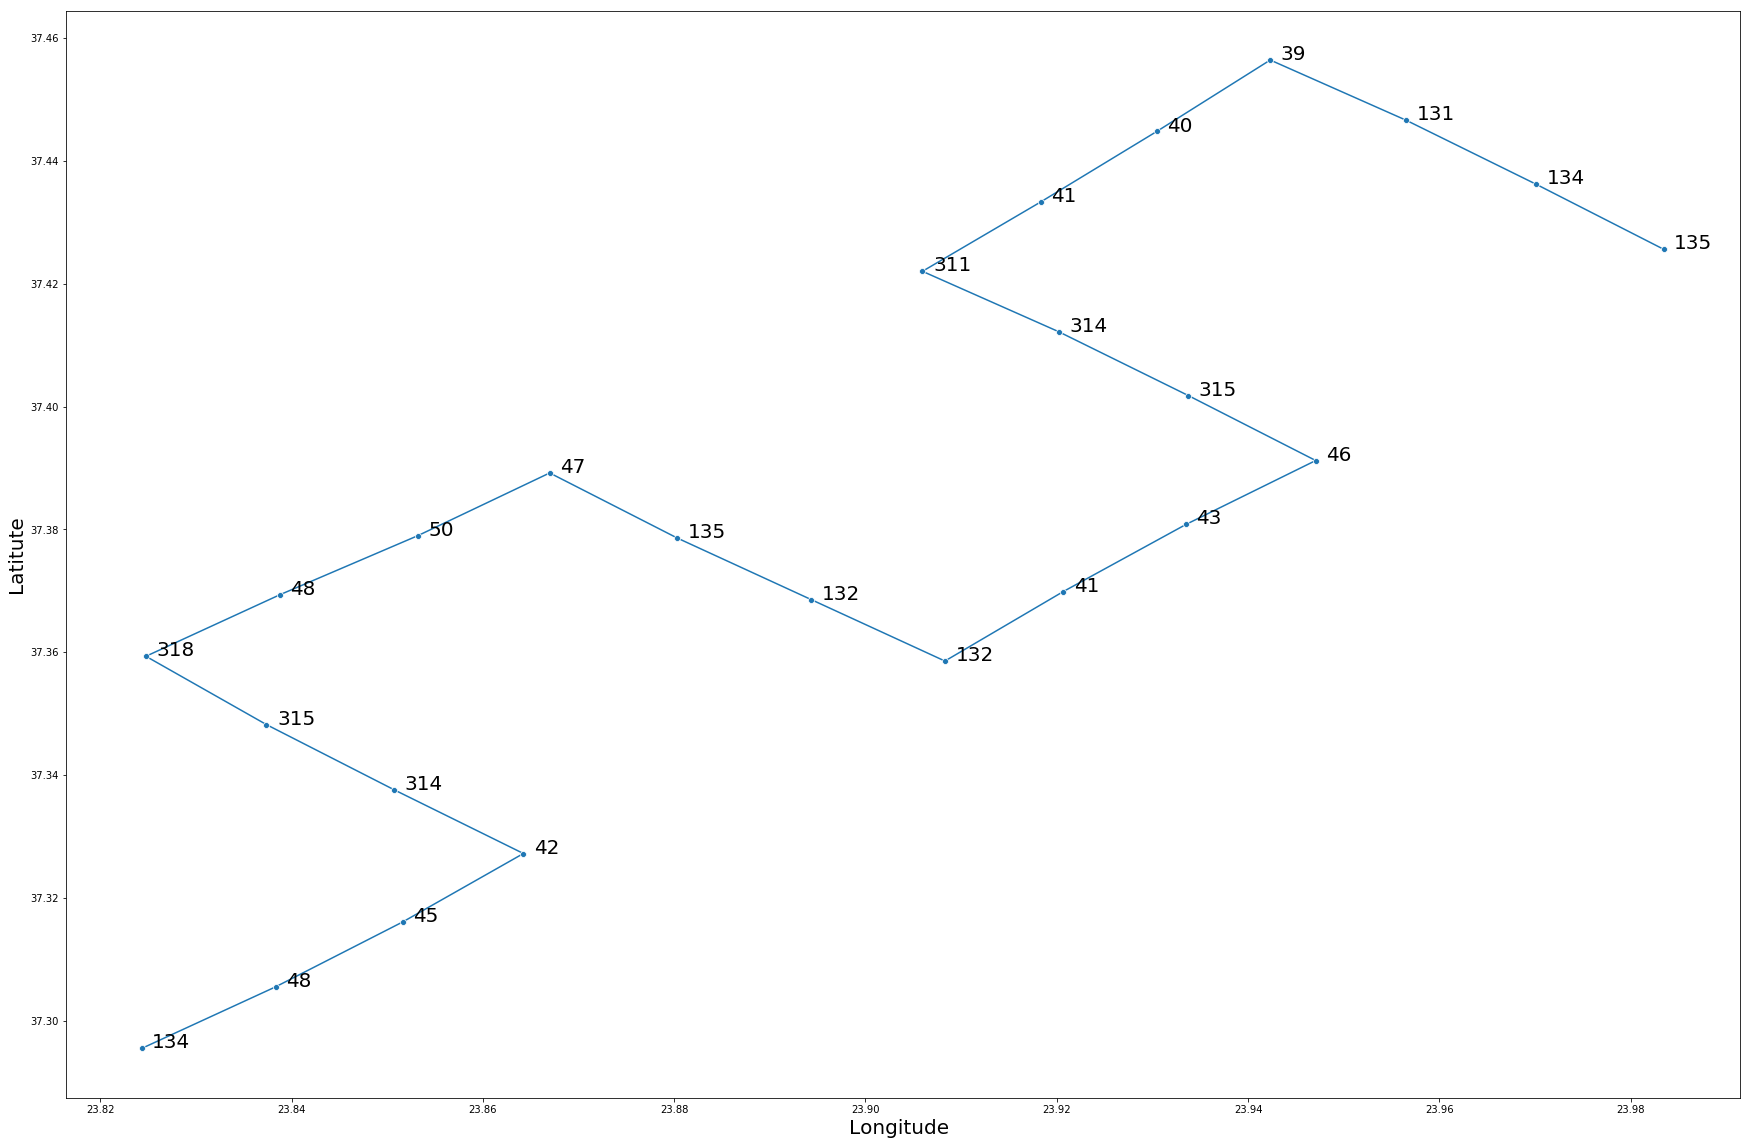

In [3]:
#for multiple trajectory plotting 
i =0
fig, ax = plt.subplots()
fig.set_size_inches(30, 20)
ax.set_ylabel('Latitute', fontsize = 20.0) # Y label
ax.set_xlabel('Longitude ', fontsize = 20.0) # X label
while i<1:
    file = "data/first_movement_0_"+first_movement[0]+"_"+str(i)+"_2015-02-01.csv"
    df =  pd.read_csv(file)
    i=i+1
    # Plot using Seaborn
    sns.lineplot(x='Lon', y='Lat', data=df, ax=ax,sort=False,marker="o")
    for j, point in df.iterrows():
        ax.text(point['Lon']+0.0011, point['Lat'], str(point['Bearing']),fontsize=20)            

ax.set_ylabel('Latitute', fontsize = 20.0) # Y label
ax.set_xlabel('Longitude ', fontsize = 20.0) # X label

Text(0.5, 0, 'Longitude ')

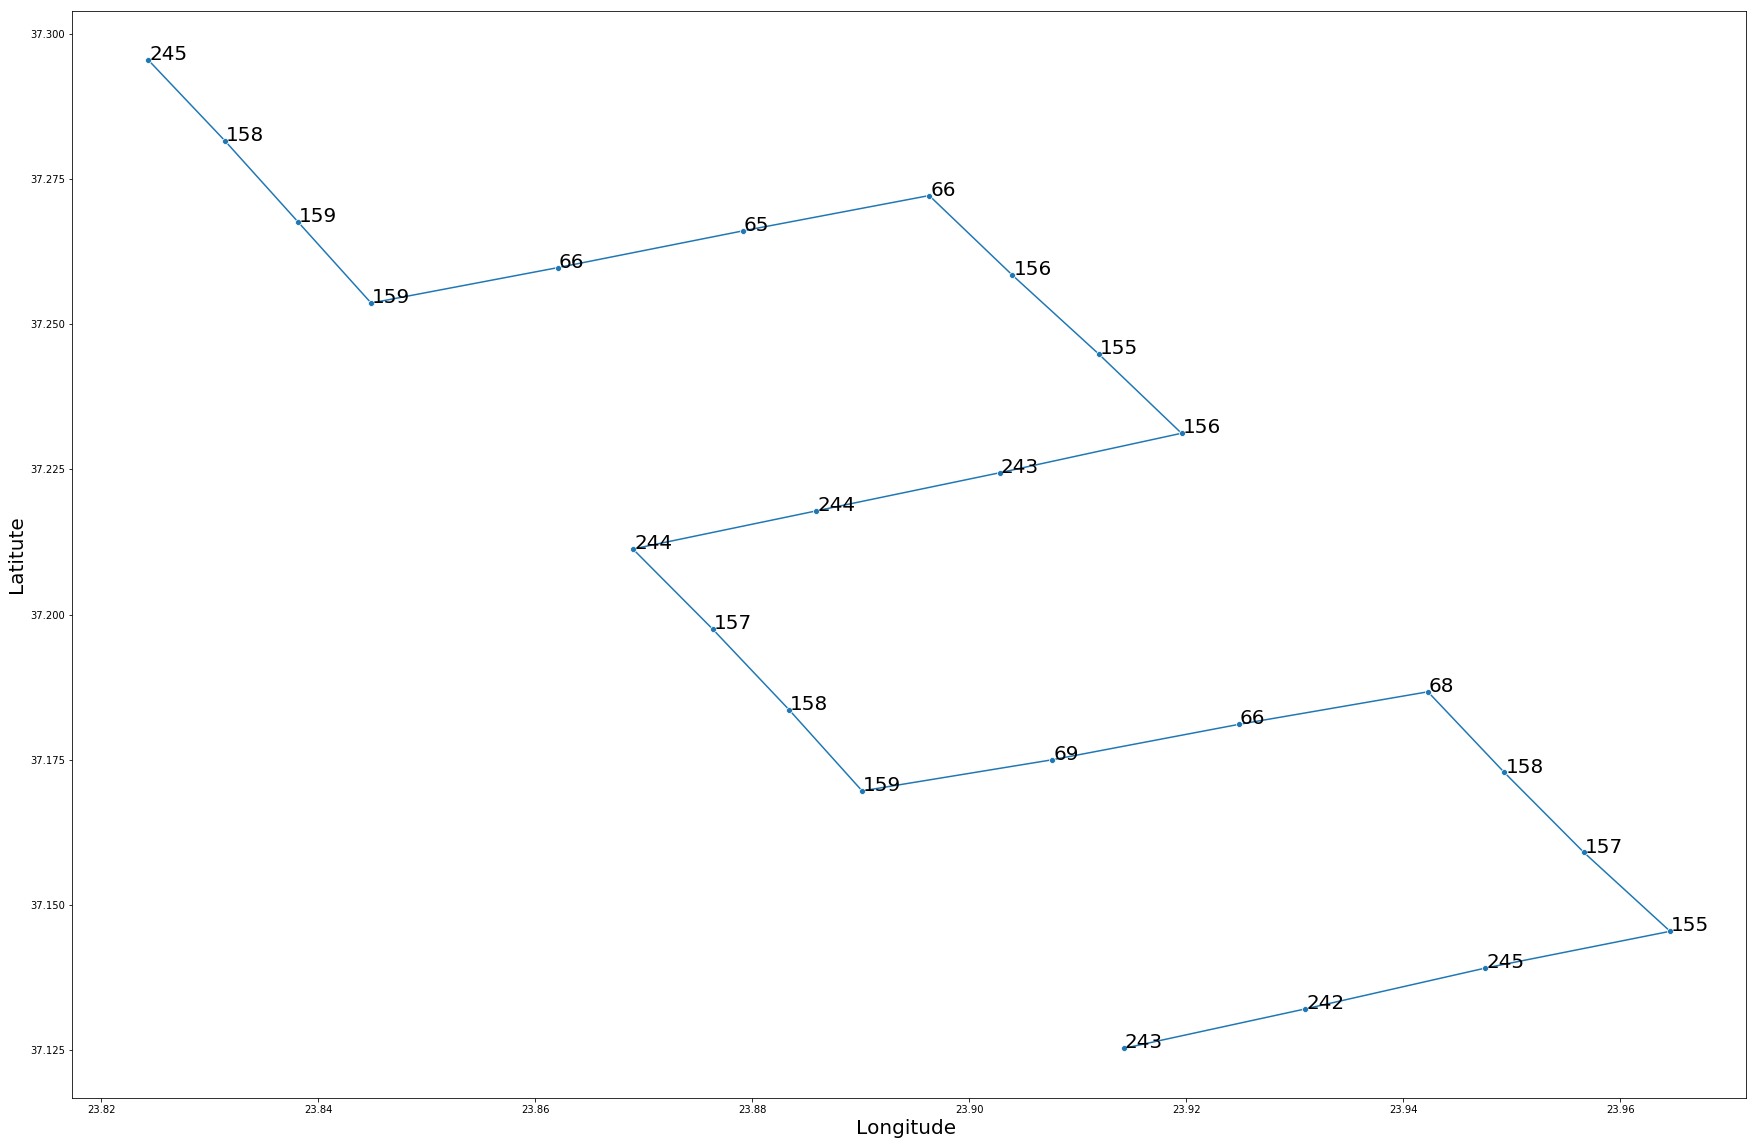

In [4]:
#for single trajectory plotting 
fig, ax = plt.subplots()
fig.set_size_inches(30, 20)
plt.rcParams.update({'font.size': 20})
file = "data/first_movement_0_"+first_movement[0]+"_1_2015-02-01.csv"
df =  pd.read_csv(file)
# Plot using Seaborn
sns.lineplot(x='Lon', y='Lat', data=df, ax=ax,sort=False,marker="o")
for i, point in df.iterrows():
    ax.text(point['Lon']+0.0001, point['Lat'], str(point['Bearing']))            

ax.set_ylabel('Latitute', fontsize = 20.0) # Y label
ax.set_xlabel('Longitude ', fontsize = 20.0) # X label